In [ ]:
#for libaries
!pip install tensorflow scikit-learn matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#matplotlib for visualization of data set
#tensorflow for keras data sets, machine learning and deep learning
#deep learning algorithms for model training

In [ ]:
#importing data set and separation of data set as training and testing
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#X_train : feature (images)
#y_train : label (representing the class which each image belongs)


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#it will automatically train 60,000 images as 28x28 pixels and test 10,000 images
#X_train is 60,000 images(feature)
#y_train is 10,000 images (label)
def print_dataset_shapes(X_train, y_train, X_test, y_test):
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
print_dataset_shapes(X_train, y_train, X_test, y_test)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
#printing size of each image
def print_image_shape(X_train):
    print("size of 1 image:", X_train[0].shape)

print_image_shape(X_train)

size of 1 image: (28, 28)


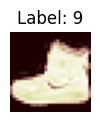

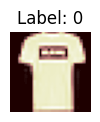

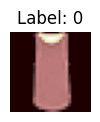

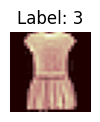

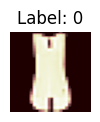

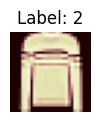

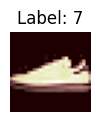

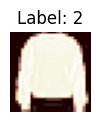

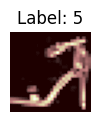

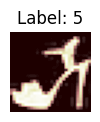

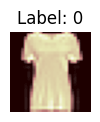

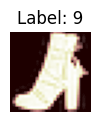

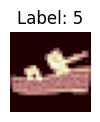

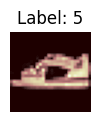

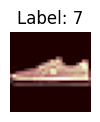

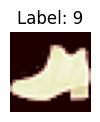

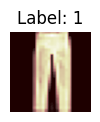

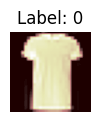

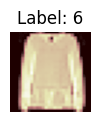

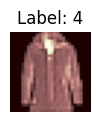

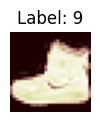

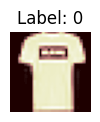

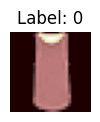

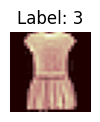

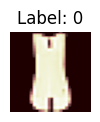

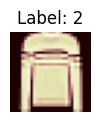

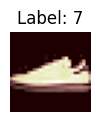

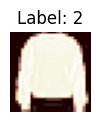

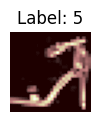

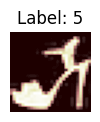

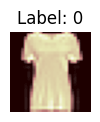

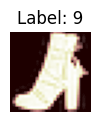

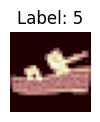

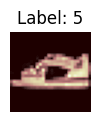

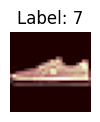

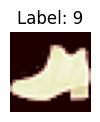

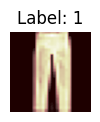

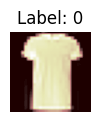

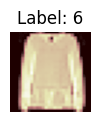

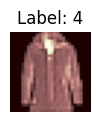

In [ ]:
#visualization of 20 images from data set
def visualize_images(X_train, y_train):
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='pink')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

visualize_images(X_train, y_train)

visualize_images(X_train, y_train)

In [ ]:
#normalization of data
X_train = X_train / 255.0
X_test = X_test / 255.0
#changing from 0-255 to 0-1 for easy learning, it will be hard if we leave the
#pixels from 0-255


In [ ]:
#creating the model
#this cell creates simple DNN artifical neural network model
#input layer : smoothing/flattens
#hidden layr : 128 neurons -relu activation
#output layer : 10 neurons - softmax activation
#sequential class allows us to add layers sequentially
#Sequential: in keras, it is a model type that allows layers to be added sequentially
#each layer in the model takes the output of the previous layer as input.
#flatten layer: converts 2D to 1D vectors - this makes more suitable form for other layers to understand and use the data
#dense : fully connected - every neuron is connected to other neurons in other layers
#128, activation='relu' : 128 is the neurons - relu is activation function that sets negative values equal to zero and positive values equal to itself
#purpose : to learn abstract features and map them to higher dimensional space
#this helps model recognize more complex patterns
#10 neurons at output layer because total number of categories in data set
#softmax : transforms input vector to probability distrubution
#probability value for each class : between 0 and 1, sum of probabilities = 1
#purpose : to produce a probability value for each of the model's predictions-used to determine which class the model belongs to with the highest probability

model = Sequential([
 Flatten(input_shape=(28, 28)), #input layer flattens the data
 Dense(128, activation='relu'), #hidden layer - fully connected
 Dense(10, activation='softmax') #output layer
])

#Input Layer: Flattens 2D images.
#Hidden Layer: Learns intermediate features using the ReLU activation function with 128 neurons.
#Output Layer: Produces probability values ​​for each class using the Softmax activation function with 10 neurons.

In [ ]:
#compilation of model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training of the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
#predictions of the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
#calculation of evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.0481
Precision: 0.12443959515339627
Recall: 0.0481
F1 Score: 0.03687025049382325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# K-Nearest Neighbors (KNN) model - Creating, Training, and Evaluation

# Reshape the data
# We need to flatten the images for the KNN model, which does not work with 2D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create the KNN model
# We are using 3 nearest neighbors for this model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
# The model learns from the training data
knn.fit(X_train_flat, y_train)

# The model makes predictions
# Predict the labels for the test set
y_pred_knn = knn.predict(X_test_flat)

# Calculation of evaluation metrics
# Evaluate the performance of the model using accuracy, precision, recall, and F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the evaluation metrics
# Display the performance of the KNN model
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")


KNN Accuracy: 0.8541
KNN Precision: 0.8575414622679564
KNN Recall: 0.8541
KNN F1 Score: 0.8539002124666113
